In [3]:
#!/usr/bin/env python
""" generate random particles for rendering with blender script blend_powder.py """
# Brian DeCost -- Carnegie Mellon University -- 2016

import sys
import json
import click
import numpy as np
from scipy.stats import weibull_min
from datetime import datetime
import os
from tqdm import tqdm

def fit_weibull_dist(loc=1, shape=0.1, nsamples=1e5):
    """ fit a weibull distribution to a given lognormal distribution """
    # get samples from lognormal distribution
    loc = np.log(loc)
    samples = np.random.lognormal(mean=loc, sigma=shape, size=nsamples)
    weibull_params = weibull_min.fit(samples)
    return weibull_min(*weibull_params)


def generate_sample(samplesize, textfile, distribution, loc, shape):
    """ sample particle sizes from a distribution and make a json file """

    # sample particle  sizes from a specified generating distribution
    if distribution == 'lognormal':
        loc = np.log(loc)
        size = np.random.lognormal(mean=loc, sigma=shape, size=samplesize)
    elif distribution == 'normal':
        size = np.random.normal(loc=loc, scale=shape, size=samplesize)
        size=np.abs(size)
    elif distribution == 'weibull_fit':
        # fit a weibull distribution to a lognormal distribution
        nsamples = 1e5
        dist = fit_weibull_dist(loc=loc, shape=shape, nsamples=nsamples)
        size = dist.rvs(size=samplesize)
    else:
        sys.exit('error: choose between normal and lognormal distributions')

    # particle positions from uniform distribution
    xx = np.random.uniform(low=0, high=1, size=samplesize)
    yy = np.random.uniform(low=0, high=1, size=samplesize)
    zz = np.random.uniform(low=0, high=1, size=samplesize)

    # serialize everything to json for the blender script
    particles = []
    for s, x, y, z in zip(size, xx, yy, zz):
        particles.append({'size': s, 'x': x, 'y': y, 'z': z})

    data = {
        'distribution': distribution,
        'loc': loc,
        'shape': shape,
        'timestamp': datetime.utcnow().isoformat(),
        'particles': particles
    }
    curpath = os.path.abspath(os.curdir)
    packet_file = "%s/%s/%s/%s.mol2" % ("dir", "dir2", "dir3", "some_file")
    with open(textfile, 'w') as f:
        json.dump(data, f)


In [4]:
for i in tqdm(range(3000)):
    generate_sample(int(np.random.rand()*300),'particles\particles{}.json'.format(i),np.random.choice(['lognormal','normal']),np.random.rand()/2,np.random.rand())

100%|█████████████████████████████████████| 3000/3000 [00:14<00:00, 201.19it/s]


In [15]:
import cv2
from matplotlib.pyplot import imshow

In [8]:
#os.listdir('textures')

In [9]:
texturefiles=[]
textpath='textures'
for textfile in os.listdir(textpath):
    if textfile[-4:]=='.jpg':
        texturefiles.append(textpath+'\\'+ textfile)

In [22]:
for path in texturefiles:
    img=cv2.imread(path)
    crop_img = img[:125, :]
    newpath="\\".join(path.split('\\')[:-1])+'\\newtext\\'+path.split('\\')[-1]
    if os.path.isfile(newpath)==False:
        cv2.imwrite(newpath, crop_img)

In [12]:
#cv2.imshow("cropped", crop_img)

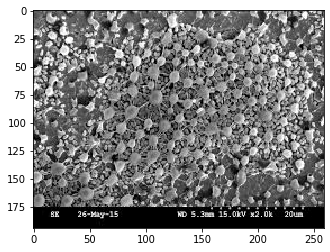

In [23]:
#imshow(img)

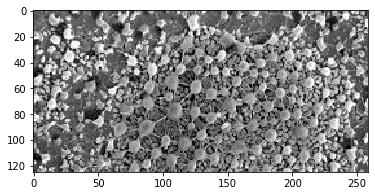

In [24]:
#imshow(crop_img)